# Our Algorithm

[1 2 3 4]
[1 2 3 4 5 6 7 8 9]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]


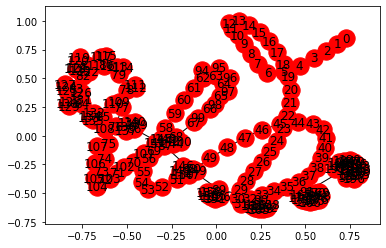

In [7]:
from __future__ import print_function
from __future__ import print_function
import numpy as np
import bayesiancoresets as bc
import time
import warnings
from scipy.stats import uniform
from scipy import sparse
import math 
import bayesiancoresets_C as bcc
from numpy import array
from scipy.linalg import svd
from numpy.linalg import inv
from numpy import linalg as LA
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from multiprocessing import Pool
import itertools

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline
from copy import deepcopy
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
from copy import deepcopy
from sklearn.neighbors import NearestNeighbors
import numpy as np
# import uniform module to create random numbers
from scipy.stats import uniform
from scipy import sparse
from numpy import linalg as LA

import math 
warnings.filterwarnings('ignore', category=UserWarning) #tests will generate lots of warnings re: reaching numeric limits; ignore those here

from sklearn.neighbors import NearestNeighbors
import numpy as np
# import uniform module to create random numbers
from scipy.stats import uniform
from scipy import sparse
import math 
#from sklearn.mixture import GMM
import networkx as nx
import matplotlib.pyplot as plt

from scipy import linalg
from numpy import array
from scipy.linalg import svd
from numpy.linalg import inv
from numpy import linalg as LA
import numpy as np
from __future__ import print_function
import numpy as np
import bayesiancoresets as bc
import time
import warnings
import scipy.io as sio
warnings.filterwarnings('ignore', category=UserWarning) #tests will generate lots of warnings re: reaching numeric limits; ignore those here





Dim=2
n_trials = 1
N=100
ITR=1
QQ= np.arange(4, 20, 5)
Error       = np.zeros(len(QQ))
Error_RND    = np.zeros(len(QQ))
Error_FW     = np.zeros(len(QQ))
Error_IS     = np.zeros(len(QQ))
Error_MP     = np.zeros(len(QQ))
Error_Cost   = np.zeros(len(QQ))
Error_Random = np.zeros(len(QQ))
Error_KSP    = np.zeros(len(QQ))
Error_BC     = np.zeros(len(QQ))

C = np.genfromtxt("CC.txt",delimiter=",")
C = C[1:N+1]
C= np.array(C, dtype=float)
Cost=C    



f=10
score2=np.zeros(f)
lam=0
maxiter=10
cost=Cost




anms = ['GIGA', 'FW','MP','IS', 'RND']
algs = [bc.GIGA, bc.FrankWolfe, bc.MatchingPursuit, bc.ImportanceSampling, bc.RandomSubsampling]

 ######################## Graph by producing an Adjacency matrix ##################################################
N=200 

'''
import networkx as nx
__author__ = """\n""".join(['Jordi Torrents <jtorrents@milnou.net>',
                        'Katy Bold <kbold@princeton.edu>',
                        'Aric Hagberg <aric.hagberg@gmail.com)'])

__all__ = ['karate_club_graph', 'davis_southern_women_graph',
       'florentine_families_graph']


def karate_club_graph():
"""Return Zachary's Karate Club graph.

Each node in the returned graph has a node attribute ``'club'`` that
indicates the name of the club to which the member represented by that node
belongs, either ``'Mr. Hi'`` or ``'Officer'``.

Examples
--------
To get the name of the club to which a node belongs::

    >>> import networkx as nx
    >>> G = nx.karate_club_graph()
    >>> G.node[5]['club']
    'Mr. Hi'
    >>> G.node[9]['club']
    'Officer'

References
----------
.. [1] Zachary, Wayne W.
   "An Information Flow Model for Conflict and Fission in Small Groups."
   *Journal of Anthropological Research*, 33, 452--473, (1977).

.. [2] Data file from:
   http://vlado.fmf.uni-lj.si/pub/networks/data/Ucinet/UciData.htm
"""
# Create the set of all members, and the members of each club.
all_members = set(range(34))
club1 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 16, 17, 19, 21}
# club2 = all_members - club1

G = nx.Graph()
G.add_nodes_from(all_members)
G.name = "Zachary's Karate Club"

zacharydat = """\
0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0
1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0
1 1 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0
1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1
0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 1
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1
0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1
0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1
0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1
0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 0 0 0 0 0 1 1 1 0 1
0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 0"""

for row, line in enumerate(zacharydat.split('\n')):
    thisrow = [int(b) for b in line.split()]
    for col, entry in enumerate(thisrow):
        if entry == 1:
            G.add_edge(row, col)

# Add the name of each member's club as a node attribute.
for v in G:
    G.node[v]['club'] = 'Mr. Hi' if v in club1 else 'Officer'
return G


def davis_southern_women_graph():
"""Return Davis Southern women social network.

This is a bipartite graph.

References
----------
.. [1] A. Davis, Gardner, B. B., Gardner, M. R., 1941. Deep South.    
    University of Chicago Press, Chicago, IL.
"""
G = nx.Graph()
# Top nodes
women = ["Evelyn Jefferson",
         "Laura Mandeville",
         "Theresa Anderson",
         "Brenda Rogers",
         "Charlotte McDowd",
         "Frances Anderson",
         "Eleanor Nye",
         "Pearl Oglethorpe",
         "Ruth DeSand",
         "Verne Sanderson",
         "Myra Liddel",
         "Katherina Rogers",
         "Sylvia Avondale",
         "Nora Fayette",
         "Helen Lloyd",
         "Dorothy Murchison",
         "Olivia Carleton",
         "Flora Price"]
G.add_nodes_from(women, bipartite=0)
# Bottom nodes
events = ["E1",
          "E2",
          "E3",
          "E4",
          "E5",
          "E6",
          "E7",
          "E8",
          "E9",
          "E10",
          "E11",
          "E12",
          "E13",
          "E14"]
G.add_nodes_from(events, bipartite=1)

G.add_edges_from([("Evelyn Jefferson","E1"),
                  ("Evelyn Jefferson","E2"),
                  ("Evelyn Jefferson","E3"),
                  ("Evelyn Jefferson","E4"),
                  ("Evelyn Jefferson","E5"),
                  ("Evelyn Jefferson","E6"),
                  ("Evelyn Jefferson","E8"),
                  ("Evelyn Jefferson","E9"),
                  ("Laura Mandeville","E1"),
                  ("Laura Mandeville","E2"),
                  ("Laura Mandeville","E3"),
                  ("Laura Mandeville","E5"),
                  ("Laura Mandeville","E6"),
                  ("Laura Mandeville","E7"),
                  ("Laura Mandeville","E8"),
                  ("Theresa Anderson","E2"),
                  ("Theresa Anderson","E3"),
                  ("Theresa Anderson","E4"),
                  ("Theresa Anderson","E5"),
                  ("Theresa Anderson","E6"),
                  ("Theresa Anderson","E7"),
                  ("Theresa Anderson","E8"),
                  ("Theresa Anderson","E9"),
                  ("Brenda Rogers","E1"),
                  ("Brenda Rogers","E3"),
                  ("Brenda Rogers","E4"),
                  ("Brenda Rogers","E5"),
                  ("Brenda Rogers","E6"),
                  ("Brenda Rogers","E7"),
                  ("Brenda Rogers","E8"),
                  ("Charlotte McDowd","E3"),
                  ("Charlotte McDowd","E4"),
                  ("Charlotte McDowd","E5"),
                  ("Charlotte McDowd","E7"),
                  ("Frances Anderson","E3"),
                  ("Frances Anderson","E5"),
                  ("Frances Anderson","E6"),
                  ("Frances Anderson","E8"),
                  ("Eleanor Nye","E5"),
                  ("Eleanor Nye","E6"),
                  ("Eleanor Nye","E7"),
                  ("Eleanor Nye","E8"),
                  ("Pearl Oglethorpe","E6"),
                  ("Pearl Oglethorpe","E8"),
                  ("Pearl Oglethorpe","E9"),
                  ("Ruth DeSand","E5"),
                  ("Ruth DeSand","E7"),
                  ("Ruth DeSand","E8"),
                  ("Ruth DeSand","E9"),
                  ("Verne Sanderson","E7"),
                  ("Verne Sanderson","E8"),
                  ("Verne Sanderson","E9"),
                  ("Verne Sanderson","E12"),
                  ("Myra Liddel","E8"),
                  ("Myra Liddel","E9"),
                  ("Myra Liddel","E10"),
                  ("Myra Liddel","E12"),
                  ("Katherina Rogers","E8"),
                  ("Katherina Rogers","E9"),
                  ("Katherina Rogers","E10"),
                  ("Katherina Rogers","E12"),
                  ("Katherina Rogers","E13"),
                  ("Katherina Rogers","E14"),
                  ("Sylvia Avondale","E7"),
                  ("Sylvia Avondale","E8"),
                  ("Sylvia Avondale","E9"),
                  ("Sylvia Avondale","E10"),
                  ("Sylvia Avondale","E12"),
                  ("Sylvia Avondale","E13"),
                  ("Sylvia Avondale","E14"),
                  ("Nora Fayette","E6"),
                  ("Nora Fayette","E7"),
                  ("Nora Fayette","E9"),
                  ("Nora Fayette","E10"),
                  ("Nora Fayette","E11"),
                  ("Nora Fayette","E12"),
                  ("Nora Fayette","E13"),
                  ("Nora Fayette","E14"),
                  ("Helen Lloyd","E7"),
                  ("Helen Lloyd","E8"),
                  ("Helen Lloyd","E10"),
                  ("Helen Lloyd","E11"),
                  ("Helen Lloyd","E12"),
                  ("Dorothy Murchison","E8"),
                  ("Dorothy Murchison","E9"),
                  ("Olivia Carleton","E9"),
                  ("Olivia Carleton","E11"),
                  ("Flora Price","E9"),
                  ("Flora Price","E11")])
G.graph['top'] = women
G.graph['bottom'] = events
return G

def florentine_families_graph():
"""Return Florentine families graph.

References
----------
.. [1] Ronald L. Breiger and Philippa E. Pattison
   Cumulated social roles: The duality of persons and their algebras,1
   Social Networks, Volume 8, Issue 3, September 1986, Pages 215-256 
"""
G=nx.Graph()
G.add_edge('Acciaiuoli','Medici')
G.add_edge('Castellani','Peruzzi')
G.add_edge('Castellani','Strozzi')
G.add_edge('Castellani','Barbadori')
G.add_edge('Medici','Barbadori')
G.add_edge('Medici','Ridolfi')
G.add_edge('Medici','Tornabuoni')
G.add_edge('Medici','Albizzi')
G.add_edge('Medici','Salviati')
G.add_edge('Salviati','Pazzi')
G.add_edge('Peruzzi','Strozzi')
G.add_edge('Peruzzi','Bischeri')
G.add_edge('Strozzi','Ridolfi')
G.add_edge('Strozzi','Bischeri')
G.add_edge('Ridolfi','Tornabuoni')
G.add_edge('Tornabuoni','Guadagni')
G.add_edge('Albizzi','Ginori')
G.add_edge('Albizzi','Guadagni')
G.add_edge('Bischeri','Guadagni')
G.add_edge('Guadagni','Lamberteschi')
return G

A = nx.adjacency_matrix(G)
A=A.todense()
nx.draw_networkx(G)

A = np.array(A, dtype=float)

A_diag= np.diag(np.diag(A))
A=A-A_diag
dd=A.sum(axis=0)
ddd=np.array(dd)
DD=np.diag(ddd)
A=np.matmul((np.linalg.inv(DD))**(1/2),A,(np.linalg.inv(DD))**(1/2))

P=A
'''




'''
A= np.zeros((N, N))

for i in range(N):
    for j in range(i + 1, N):
        x = np.random.randint(0, 2)
        A[i, j] = x
        A[j, i] = x


G = nx.from_numpy_matrix(np.array(A)) 
nx.draw(G, with_labels=True)
A_weighted=A
D=A_weighted.sum(1)
d_max=D.max()
P=1/d_max*(A_weighted-np.diag(D))+np.eye(N)  

P = np.linalg.matrix_power(P,3)




A_diag= np.diag(np.diag(A))
A=A-A_diag
dd=A.sum(axis=0)
ddd=np.array(dd)
DD=np.diag(ddd)
A=np.matmul((np.linalg.inv(DD))**(1/2),A,(np.linalg.inv(DD))**(1/2))

P=A



#     import sklearn.cluster as cl
#     from sklearn.decomposition import PCA


#     pca = PCA(n_components=100)
#     pca.fit(A)
#     A = pca.transform(A)
'''

######################################################################
'''
G = nx.geographical_threshold_graph(200, .5, dim=2, pos=None, weight=None, metric=None, p_dist=None, seed=None)

A = nx.adjacency_matrix(G)
A=A.todense()
A = np.array(A, dtype=float)
A_diag= np.diag(np.diag(A))
A=A-A_diag
dd=A.sum(axis=0)
ddd=np.array(dd)
DD=np.diag(ddd)
A=np.matmul((np.linalg.inv(DD))**(1/2),A,(np.linalg.inv(DD))**(1/2))

P=A
'''



#######################################################################
'''
N=200
G = nx.generators.barabasi_albert_graph(N, 60)

# G = nx.read_edgelist("facebook_combined.txt", create_using = nx.Graph(), nodetype = int)
A = nx.adjacency_matrix(G)
A=A.todense()
A = np.array(A, dtype=float)
A_weighted=A
D=A_weighted.sum(1)
d_max=D.max()
P=1/d_max*(A_weighted-np.diag(D))+np.eye(N)  

P = np.linalg.matrix_power(P,3)


A_diag= np.diag(np.diag(A))
A=A-A_diag
dd=A.sum(axis=0)
ddd=np.array(dd)
DD=np.diag(ddd)
A=np.matmul((np.linalg.inv(DD))**(1/2),A,(np.linalg.inv(DD))**(1/2))

P=A
import scipy.io as sio
sio.savemat('np_vector_Barbasi.mat', {'A':A})
'''


################# Random Tree Graph #####################


G= nx.random_powerlaw_tree(N, gamma=3, seed=None, tries=10000)


A = nx.adjacency_matrix(G)
A=A.todense()
nx.draw_networkx(G)

A = np.array(A, dtype=float)
B = np.random.rand(N,N)
B_symm = (B + B.T)/2
A_weighted =A #A_weighted=np.multiply(A, B_symm)

D=A_weighted.sum(1)
d_max=D.max()
P=1/d_max*(A_weighted-np.diag(D))+np.eye(N)  

P = np.linalg.matrix_power(P,2)

A_diag= np.diag(np.diag(A))
A=A-A_diag
dd=A.sum(axis=0)
ddd=np.array(dd)
DD=np.diag(ddd)
A=np.dot(np.dot((np.linalg.inv(DD))**(1/2),A), (np.linalg.inv(DD))**(1/2))

P=A

sio.savemat('np_vector.powerlaw', {'A':A})

##############################################


#######################################  

# Saeed
# Distance of each node of the Graph from all nodes of the Graph     


dist_w_G=0
D_w_G=np.zeros((len(A),len(A)))
for i in range(len(A)):
    for j in range(len(A)):
        dist=nx.dijkstra_path(G, i, j)
        for k in range(len(dist)-1):
            dist_w_G=dist_w_G + A[dist[k],dist[k+1]]
        D_w_G[i,j]=dist_w_G
        dist_w_G=0
Dist_G= D_w_G.sum(axis=1)/(N-1)
#     print('The distance of each vertex from the selected vertices is:','\n', Dist_G)


################################################



Dist_store = np.zeros((N,len(QQ)))

for s in range(len(QQ)):
    idx=[]
    Ms =np.unique(np.logspace(0., np.log10(QQ[s]), dtype=int))  #
    print(Ms)
    err = np.zeros((len(anms), n_trials, Ms.shape[0]))
    scaled_err = np.zeros((len(anms), n_trials, Ms.shape[0]))
    csize = np.zeros((len(anms), n_trials, Ms.shape[0]))
    cput = np.zeros((len(anms), n_trials, Ms.shape[0]))
    for tr in range(n_trials):
        X = P
        XS = 1/N*X.sum(axis=0)
        for aidx, anm in enumerate(anms):
#             print('data: gauss, trial ' + str(tr+1) + '/' + str(n_trials) + ', alg: ' + anm)
            alg = algs[aidx](X)

            for m, M in enumerate(Ms):
              t0 = time.time()
              alg.run(M)
              tf = time.time()
              cput[aidx, tr, m] = tf-t0 + cput[aidx, tr, m-1] if m > 0 else tf-t0
              wts = alg.weights()
              wts = alg.weights()/ alg.weights().sum()#err[aidx, tr, m] = np.sqrt(((np.matmul(X,wts) - XS)**2).sum())# wts = alg.weights(optimal_scaling=True)#scaled_err[aidx, tr, m] = np.sqrt(((np.matmul(X,wts) - XS)**2).sum())
              csize[aidx, tr, m] = (wts > 0).sum()
              idx.append(wts.nonzero()[0].tolist())  



###############################################################################  #    

##Saeed
##Distance of each node of the Graph from the selected point
    wts_non=np.nonzero(wts)
#         wts_non=idx[9][0:11]
    dist_w=0
    D_w=np.zeros((len(A),len(wts_non[0])))
    G = nx.from_numpy_matrix(A, create_using=nx.Graph())
    for j in range(len(wts_non[0])):
        for i in range(len(A)):
            dist=nx.dijkstra_path(G, i, wts_non[0][j])
            for k in range(len(dist)-1):
                dist_w=dist_w + A[dist[k],dist[k+1]]
            D_w[i,j]=dist_w
            dist_w=0
    Dist_Selected_vertices= np.matmul(D_w,wts[wts_non[0]])
    Dist_Selected_vertices_2= D_w.sum(axis=1)/len(wts_non[0]) #unweighted distance
    #Dist_store[:,s] = Dist_Selected_vertices


    Error[s]     = (np.absolute(Dist_G-Dist_Selected_vertices)).mean()


########################################################      
# Random Sampling:

    D_w_3=np.zeros((len(A),len(wts_non[0])))
    wts_non= np.nonzero(wts)
    R=np.random.randint(0, 33, len(wts_non[0]), int) 
    dist_w=0
    G = nx.from_numpy_matrix(A, create_using=nx.Graph())
    for j in range(len(wts_non[0])):
        for i in range(len(A)):
            dist=nx.dijkstra_path(G, i, R[j])
            for k in range(len(dist)-1):
                dist_w=dist_w + A[dist[k],dist[k+1]]
            D_w_3[i,j]=dist_w
            dist_w=0
    Dist_Selected_vertices_3 = D_w_3.sum(axis=1)/R[j] #unweighted distance

    Error_Random[ s]     = (np.absolute(Dist_G-Dist_Selected_vertices_3)).mean()


########################################################      
# RND

    '''
    D_w_3=np.zeros((len(A),len(wts_non[0])))
    wts_non=np.nonzero(wts)
    R= idx[33][0:11] #csize[3][0] 
    dist_w=0
    G = nx.from_numpy_matrix(A, create_using=nx.Graph())
    for j in range(10):
        for i in range(len(A)):
            dist=nx.dijkstra_path(G, i, R[j])
            for k in range(len(dist)-1):
                dist_w=dist_w + A[dist[k],dist[k+1]]
            D_w_3[i,j]=dist_w
            dist_w=0
    Dist_Selected_vertices_3 = D_w_3.sum(axis=1)/R[j] #unweighted distance    
    Error_Random[kk, s]     = (np.absolute(Dist_G-Dist_Selected_vertices_3)).mean()

    '''
########################################################      
# Frank Wolfe: anms = ['GIGA', 'FW', 'MP','IS', 'RND']

    '''
    D_w_FW=np.zeros((len(A),len(wts_non[0])))
    R=idx[9][0:11] #csize[1][0]
    dist_w=0
    G = nx.from_numpy_matrix(A, create_using=nx.Graph())
    for j in range(10):
        for i in range(len(A)):
            dist=nx.dijkstra_path(G, i, R[j])
            for k in range(len(dist)-1):
                dist_w=dist_w + A[dist[k],dist[k+1]]
            D_w_FW[i,j]=dist_w
            dist_w=0
    Dist_Selected_vertices_FW = D_w_FW.sum(axis=1)/R[j] #unweighted distance


    Error_FW[kk, s]  = (np.absolute(Dist_G-Dist_Selected_vertices_FW)).mean()

    '''


########################################################      
# MP:   
    '''

    D_w_MP=np.zeros((len(A),len(wts_non[0])))
    R=csize[2][0]
    dist_w=0
    G = nx.from_numpy_matrix(A, create_using=nx.Graph())
    for j in range(len(wts_non[0])):
        for i in range(len(A)):
            dist=nx.dijkstra_path(G, i, R[j])
            for k in range(len(dist)-1):
                dist_w=dist_w + A[dist[k],dist[k+1]]
            D_w_MP[i,j]=dist_w
            dist_w=0
    Dist_Selected_vertices_MP = D_w_MP.sum(axis=1)/R[j] #unweighted distance

    Error_MP[kk, s]  = (np.absolute(Dist_G-Dist_Selected_vertices_MP)).mean()
    '''

########################################################      
# IS:   
    '''

    D_w_IS=np.zeros((len(A),len(wts_non[0])))
    R=idx[21][0:11]#csize[2][0]
    print(wts_non)
    dist_w=0
    G = nx.from_numpy_matrix(A, create_using=nx.Graph())
    for j in range(10):
        for i in range(len(A)):
            dist=nx.dijkstra_path(G, i, R[j])
            for k in range(len(dist)-1):
                dist_w=dist_w + A[dist[k],dist[k+1]]
            D_w_IS[i,j]=dist_w
            dist_w=0
    Dist_Selected_vertices_IS = D_w_IS.sum(axis=1)/R[j] #unweighted distance    


    Error_IS[kk, s]  = (np.absolute(Dist_G-Dist_Selected_vertices_IS)).mean()

    '''
########################################################      




####################################################
# Function for finding the difference of two lists

def Diff(li1, li2): 
    li_dif = [i for i in li1 if i not in li2] 
    return li_dif 
# P=P - np.diag(np.diag(P))

cput_IPM = np.zeros(len(QQ))



####################################################
# IPM algorithm with cost associated

def SP_cost(A,K,maxiter):
    At=A
    inds = []
    for k in range(K):
        u, s, vt = svd(At)
        cr=s[0]*np.absolute(vt[0,:])
        SET=np.argmax(cr)
        p=SET

        inds.append(p)
        A3=A[:,inds]
        At=A-0.5*np.dot(np.dot(np.dot(A3,linalg.pinv(0.01*np.eye(k + 1)+ np.dot(np.transpose(A3),A3))), np.transpose(A3)),A)

    for i in range(maxiter-1):
        for k in range (K):
            x=np.unique(Diff(inds, [inds[k], ])) 
            A3= A[:,x]
            At=A-np.dot(np.dot(np.dot(A3,linalg.pinv(np.dot(np.transpose(A3),A3))),np.transpose(A3)),A)
            u, s, vt = svd(At)
            cr=s[0]*np.absolute(vt[0,:])
            SET=np.flip(np.argsort(cr))
            for c in range(f):
                p=SET[c]
                inds[k]=p

                A3=A[:,inds]
                Prj=A-np.dot(np.dot(np.dot(A3,linalg.pinv(np.dot(np.transpose(A3),A3))),np.transpose(A3)),A)

                score2[c]=LA.norm(Prj, 2)
            p=np.argmin(score2)
            inds[k]=SET[p]
    return inds




for jj in range(len(QQ)):
    K=SP_cost(A,QQ[jj],10)
    dist_w=0
    D_w_KSP=np.zeros((len(A),len(K)))
    for j in range(len(K)):
        for i in range(len(A)):
            if A[i,K[j]]==0:
                D_w_KSP[i,j]=100000
            else:
                dist=nx.dijkstra_path(G, i, K[j])
                for k in range(len(dist)-1):
                    dist_w=dist_w + A[dist[k],dist[k+1]]
                D_w_KSP[i,j]=dist_w
                dist_w=0
    Dist_Selected_vertices_IPM= D_w_KSP.sum(axis=1)/len(K) #unweighted distance


    Error_KSP[jj]   = (np.absolute(Dist_G-Dist_Selected_vertices_IPM)).mean()
    






#     dist_w=0
#     D_w_IPM=np.zeros((len(A),K))
#     for j in range(K):
#         for i in range(len(A)):
#             dist=nx.dijkstra_path(G, i, Index[j])
#             for k in range(len(dist)-1):
#                 dist_w=dist_w + A[dist[k],dist[k+1]]
#             D_w_IPM[i,j]=dist_w
#             dist_w=0
#     Dist_Selected_vertices_IPM= D_w_IPM.sum(axis=1)/K #unweighted distance



#     Error_IPM[kk,jj]   = (np.absolute(Dist_G-Dist_Selected_vertices_IPM)).mean()




####################################################
# Betweenness Centrality algorithm

top =QQ



def partitions(nodes, n):
    "Partitions the nodes into n subsets"
    nodes_iter = iter(nodes)
    while True:
        partition = tuple(itertools.islice(nodes_iter,n))
        if not partition:
            return
        yield partition

def btwn_pool(G_tuple):
    return nx.betweenness_centrality_source(*G_tuple)


def between_parallel(G, processes = None):
    p = Pool(processes=processes)
    part_generator = 4*len(p._pool)
    node_partitions = list(partitions(G.nodes(), int(len(G)/part_generator)))
    num_partitions = len(node_partitions)

    bet_map = p.map(btwn_pool,
                        zip([G]*num_partitions,
                        [True]*num_partitions,
                        [None]*num_partitions,
                        node_partitions))

    bt_c = bet_map[0]
    for bt in bet_map[1:]:
        for n in bt:
            bt_c[n] += bt[n]
    return bt_c



bt = between_parallel(G)
Dist_store = np.zeros((N,len(top)))
Error_tot= np.zeros(len(top))



for s in range(len(top)):
    max_nodes =  sorted( bt.items(), key = lambda v: -v[1])[:top[s]]
    bt_values = [5]*len(G.nodes())
    bt_colors = [0]*len(G.nodes())


##Distance of each node of the Graph from the selected point
    dist_w=0
    D_w=np.zeros((len(A),len(max_nodes)))
    for j in range(0,top[s]):
        for i in range(len(A)):
            dist=nx.dijkstra_path(G, i, max_nodes[j][0])
            for k in range(len(dist)-1):
                dist_w=dist_w + A[dist[k],dist[k+1]]
            D_w[i,j]=dist_w
            dist_w=0
    Dist_Selected_vertices= D_w.sum(axis=1)/top[s] #unweighted distance
    #Dist_store[:,s] = Dist_Selected_vertices    
    Error_BC[s] = (np.absolute(Dist_G-Dist_Selected_vertices)).mean()











In [10]:

'''
import numpy as np
import networkx as nx
N=10
A= np.zeros((N, N))

for i in range(N):
    for j in range(i + 1, N):
        x = np.random.randint(0, 2)
        A[i, j] = x
        A[j, i] = x


G = nx.from_numpy_matrix(np.array(A)) 
# nx.draw(G, with_labels=False)
spring_pos = nx.spring_layout(G)
plt.axis("off")

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [2, 3]
# 
nx.draw_networkx(G, pos = spring_pos, with_labels = False, node_size =200)

'''

'\nimport numpy as np\nimport networkx as nx\nN=10\nA= np.zeros((N, N))\n\nfor i in range(N):\n    for j in range(i + 1, N):\n        x = np.random.randint(0, 2)\n        A[i, j] = x\n        A[j, i] = x\n\n\nG = nx.from_numpy_matrix(np.array(A)) \n# nx.draw(G, with_labels=False)\nspring_pos = nx.spring_layout(G)\nplt.axis("off")\n\nimport matplotlib.pyplot as plt\nplt.rcParams[\'figure.figsize\'] = [2, 3]\n# \nnx.draw_networkx(G, pos = spring_pos, with_labels = False, node_size =200)\n\n'

In [69]:

D_w_3=np.zeros((len(A),2))
wts_non=np.nonzero(wts)
R=    [3, 25]




dist_w=0
G = nx.from_numpy_matrix(A, create_using=nx.Graph())
for j in range(2):
    for i in range(len(A)):
        dist=nx.dijkstra_path(G, i, R[j])
        for k in range(len(dist)-1):
            dist_w=dist_w + A[dist[k],dist[k+1]]
        D_w_3[i,j]=dist_w
        dist_w=0
Dist_Selected_vertices_3 = D_w_3.sum(axis=1)/10#unweighted distance    
Error_RND  = (np.absolute(Dist_G-Dist_Selected_vertices_3)).mean()
Error_RND

0.01652651560649543

In [113]:


########################################################      
# Random Sampling:
'''
D_w_3=np.zeros((len(A),len(wts_non[0])))
wts_non= np.nonzero(wts)
R=np.random.randint(0, N, len(wts_non[0]), int) 
dist_w=0
G = nx.from_numpy_matrix(A, create_using=nx.Graph())
for j in range(len(wts_non[0])):
    for i in range(len(A)):
        dist=nx.dijkstra_path(G, i, R[j])
        for k in range(len(dist)-1):
            dist_w=dist_w + A[dist[k],dist[k+1]]
        D_w_3[i,j]=dist_w
        dist_w=0
Dist_Selected_vertices_3 = D_w_3.sum(axis=1)/R[j] #unweighted distance

Error_Random[kk, s]     = (np.absolute(Dist_G-Dist_Selected_vertices_3)).mean()

'''
########################################################      
# RND

D_w_3=np.zeros((len(A),2))
wts_non=np.nonzero(wts)
R= [32, 41, 92, 98, 130, 134, 175, 176, 179, 181]


dist_w=0
G = nx.from_numpy_matrix(A, create_using=nx.Graph())
for j in range(2):
    for i in range(len(A)):
        dist=nx.dijkstra_path(G, i, R[j])
        for k in range(len(dist)-1):
            dist_w=dist_w + A[dist[k],dist[k+1]]
        D_w_3[i,j]=dist_w
        dist_w=0
Dist_Selected_vertices_3 = D_w_3.sum(axis=1)/R[j] #unweighted distance    
Error_RND  = (np.absolute(Dist_G-Dist_Selected_vertices_3)).mean()


########################################################      
# Frank Wolfe: anms = ['GIGA', 'FW', 'MP','IS', 'RND']


D_w_FW=np.zeros((len(A),10))
R=  [0, 8, 34, 52, 71, 93, 103, 110, 146, 159]

dist_w=0
G = nx.from_numpy_matrix(A, create_using=nx.Graph())
for j in range(10):
    for i in range(len(A)):
        dist=nx.dijkstra_path(G, i, R[j])
        for k in range(len(dist)-1):
            dist_w=dist_w + A[dist[k],dist[k+1]]
        D_w_FW[i,j]=dist_w
        dist_w=0
Dist_Selected_vertices_FW = D_w_FW.sum(axis=1)/R[j] #unweighted distance


Error_FW  = (np.absolute(Dist_G-Dist_Selected_vertices_FW)).mean()

########################################################  

D_w_IP=np.zeros((len(A),10))
R=  [76  , 177  ,  53 ,  131,  194 ,  197   , 49,   15  ,  78,   128]

dist_w=0
G = nx.from_numpy_matrix(A, create_using=nx.Graph())
for j in range(10):
    for i in range(len(A)):
        dist=nx.dijkstra_path(G, i, R[j])
        for k in range(len(dist)-1):
            dist_w=dist_w + A[dist[k],dist[k+1]]
        D_w_FW[i,j]=dist_w
        dist_w=0
Dist_Selected_vertices_IP = D_w_IP.sum(axis=1)/R[j] #unweighted distance


Error_KSP  = (np.absolute(Dist_G-Dist_Selected_vertices_IP)).mean()



########################################################      
# MP:   


D_w_MP=np.zeros((len(A),10))
R=  [0, 19, 71, 103, 146, 176, 159, 110, 8, 33]


dist_w=0
G = nx.from_numpy_matrix(A, create_using=nx.Graph())
for j in range(10):
    for i in range(len(A)):
        dist=nx.dijkstra_path(G, i, R[j])
        for k in range(len(dist)-1):
            dist_w=dist_w + A[dist[k],dist[k+1]]
        D_w_MP[i,j]=dist_w
        dist_w=0
Dist_Selected_vertices_MP = D_w_MP.sum(axis=1)/R[j] #unweighted distance

Error_MP  = (np.absolute(Dist_G-Dist_Selected_vertices_MP)).mean()


########################################################      
# IS:   


D_w_IS=np.zeros((len(A),10))
R= [0, 7, 17, 41, 71, 78, 141, 142, 143, 158]


print(wts_non)
dist_w=0
G = nx.from_numpy_matrix(A, create_using=nx.Graph())
for j in range(10):
    for i in range(len(A)):
        dist=nx.dijkstra_path(G, i, R[j])
        for k in range(len(dist)-1):
            dist_w=dist_w + A[dist[k],dist[k+1]]
        D_w_IS[i,j]=dist_w
        dist_w=0
Dist_Selected_vertices_IS = D_w_IS.sum(axis=1)/R[j] #unweighted distance    


Error_IS = (np.absolute(Dist_G-Dist_Selected_vertices_IS)).mean()


########################################################      





##################################

(array([  2,  32,  41,  70,  92,  98, 130, 134, 175, 176, 179, 181]),)


"\n\n\nanms = ['GIGA_Cost']#, 'FW', 'MP','IS', 'RND'\nalgs = [bcc.GIGA_Cost]#, bcc.FrankWolfe, bcc.MatchingPursuit, bcc.ImportanceSampling, bcc.RandomSubsampling\n\n# anms = ['GIGA_Cost']\n# algs = [bcc.GIGA_Cost]\n\n\nfor s in range(len(QQ)):\nMs =np.unique(np.logspace(0., np.log10(QQ[s]), dtype=int))  #\n#     print(Ms)\n\nerr = np.zeros((len(anms), n_trials, Ms.shape[0]))\nscaled_err = np.zeros((len(anms), n_trials, Ms.shape[0]))\ncsize_C = np.zeros((len(anms), n_trials, Ms.shape[0]))\ncput_C = np.zeros((len(anms), n_trials, Ms.shape[0]))\nerr = np.zeros((len(anms), n_trials, Ms.shape[0]))\n\nfor tr in range(n_trials):\n    X = P\n    XS = 1/N*X.sum(axis=0)\n    for aidx, anm in enumerate(anms):\n#             print('data: gauss, trial ' + str(tr+1) + '/' + str(n_trials) + ', alg: ' + anm)\n        alg = algs[aidx](X)\n\n        for m, M in enumerate(Ms):\n          t0 = time.time()\n          alg.run(M, Cost=C)\n          tf = time.time()\n          cput_C[aidx, tr, m] = tf-t0 + cp

In [11]:
'''
# G = nx.read_edgelist("facebook_combined.txt", create_using = nx.Graph(), nodetype = int)
# A = nx.adjacency_matrix(G)
# A=A.todense()
# A = np.array(A, dtype=float)



D_w_IP=np.zeros((len(A),10))
R= [0, 19, 71, 103, 146, 176, 93, 71, 52, 2]

dist_w=0
G = nx.from_numpy_matrix(A, create_using=nx.Graph())
for j in range(10):
    for i in range(len(A)):
        dist=nx.dijkstra_path(G, i, R[j])
        for k in range(len(dist)-1):
            dist_w=dist_w + A[dist[k],dist[k+1]]
        D_w_IP[i,j]=dist_w
        dist_w=0
Dist_Selected_vertices_IP = D_w_IP.sum(axis=1)/10 #unweighted distance


Error_IP  = (np.absolute(Dist_G-Dist_Selected_vertices_IP)).mean()
'''


'\n# G = nx.read_edgelist("facebook_combined.txt", create_using = nx.Graph(), nodetype = int)\n# A = nx.adjacency_matrix(G)\n# A=A.todense()\n# A = np.array(A, dtype=float)\n\n\n\nD_w_IP=np.zeros((len(A),10))\nR= [0, 19, 71, 103, 146, 176, 93, 71, 52, 2]\n\ndist_w=0\nG = nx.from_numpy_matrix(A, create_using=nx.Graph())\nfor j in range(10):\n    for i in range(len(A)):\n        dist=nx.dijkstra_path(G, i, R[j])\n        for k in range(len(dist)-1):\n            dist_w=dist_w + A[dist[k],dist[k+1]]\n        D_w_IP[i,j]=dist_w\n        dist_w=0\nDist_Selected_vertices_IP = D_w_IP.sum(axis=1)/10 #unweighted distance\n\n\nError_IP  = (np.absolute(Dist_G-Dist_Selected_vertices_IP)).mean()\n'

# Figures

<IPython.core.display.Javascript object>


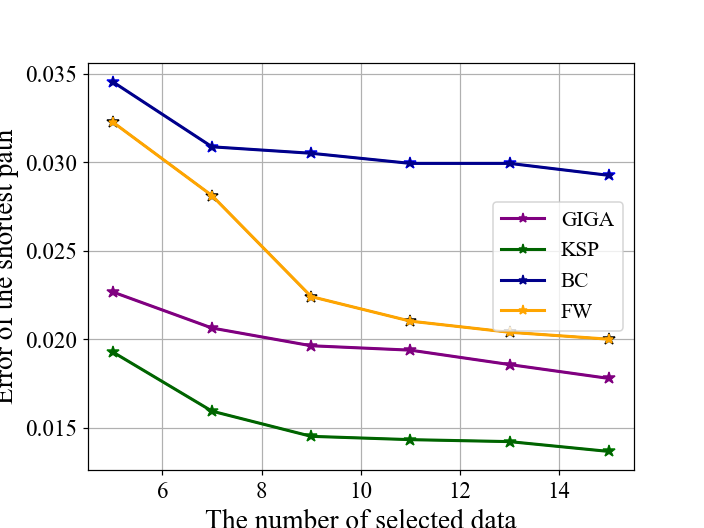

In [6]:
import matplotlib.pyplot as plt
import matplotlib 
matplotlib.use('nbagg')
import numpy as np
import pylab
%matplotlib notebook
import matplotlib.font_manager as font_manager

QQ= np.arange(5, 16, 2)
# Error_IPM=array([0.02508635 , 0.02316712, 0.01898404, 0.01629304, 0.01555057, 0.01455422])
# Error_Cost=array([0.02517888, 0.02049799, 0.01732639, 0.01492556, 0.01442567,
#        0.0130458 ])
# Error_FW=array([0.02568635, 0.02366712, 0.02071702, 0.01794642, 0.01695232,
#        0.01497409])
# Error_BC=array([0.02966562, 0.02548261, 0.02322364, 0.02129286, 0.02028076,
#        0.01900788])


#Power Cluster:
Giga = np.array([0.03226613, 0.02811497, 0.0224072 , 0.02101976, 0.02039115, 0.02])
IPM = np.array([0.02266861, 0.02063092, 0.01962908, 0.01938062, 0.01856627,
       0.01778347])
FW= np.array([0.03454465, 0.03087289, 0.03050755, 0.02993531, 0.02993531,
       0.02925986])
BC= np.array([0.01927452, 0.01593312, 0.01451025, 0.01432273, 0.0142114 ,
       0.01365648])

# pylab.plot( QQ, Error_IPM.mean(axis=0),color='orange', marker='*', markersize=8, linewidth=1.3)
# # pylab.plot( QQ, Error_IPM,color='orange', marker='*', markersize=8, linewidth=1.3)

# pylab.plot( QQ, Error_Cost.mean(axis=0),color='red', marker='*', markersize=8, linewidth=1.3)
# # pylab.plot( QQ, Error_MP.mean(axis=0),color='black', marker='*', markersize=8, linewidth=1.3)
# pylab.plot( QQ, Error_FW.mean(axis=0),color='blue', marker='*', markersize=8, linewidth=1.3)
# pylab.plot( QQ, Error_BC.mean(axis=0),color='green', marker='*', markersize=8, linewidth=1.3)

pylab.plot( QQ, IPM,color='purple', marker='*', markersize=8, linewidth=1.3)
pylab.plot( QQ, BC,color='green', marker='*', markersize=8, linewidth=1.3)

pylab.plot( QQ, Giga,color='black', marker='*', markersize=8, linewidth=1.3)

pylab.plot( QQ, FW,color='blue', marker='*', markersize=8, linewidth=1.3)





plt.gca().legend(('GIGA', 'KSP','FW', 'BC'),fontsize=13)#,'IS','Random'

pylab.xlabel('The Number of Selected Data',fontsize=13)
pylab.ylabel('Error of the Shortest Path on Graph',fontsize=13)
plt.show()


In [7]:
import matplotlib.pyplot as plt
QQ= np.arange(5, 16, 2)
x =QQ

plt.plot(x, IPM, "-*", label="GIGA", linewidth=2, color='purple')
plt.plot(x, BC, "-*", label="KSP", linewidth=2, color='darkgreen')
plt.plot(x, FW, "-*", label="BC", linewidth=2, color='darkblue')
plt.plot(x, Giga, "-*", label="FW", linewidth=2, color='orange')
# plt.plot(x, Error_IPM, "-*", label="RND", linewidth=2)
plt.legend(fontsize=14)


plt.xlabel('The number of selected data', fontsize=18, fontname='Times New Roman' )
plt.ylabel('Error of the shortest path',fontsize=18, fontname='Times New Roman')

# plt.xticks([2, 3, 5], size=14)
# plt.yticks(size=14)
plt.savefig("siamese.png")
plt.show()

plt.grid()

font = {'family' : 'Times New Roman',
        'weight' : 'bold',
        'size'   : 15}	
matplotlib.rc('font', **font)

<IPython.core.display.Javascript object>


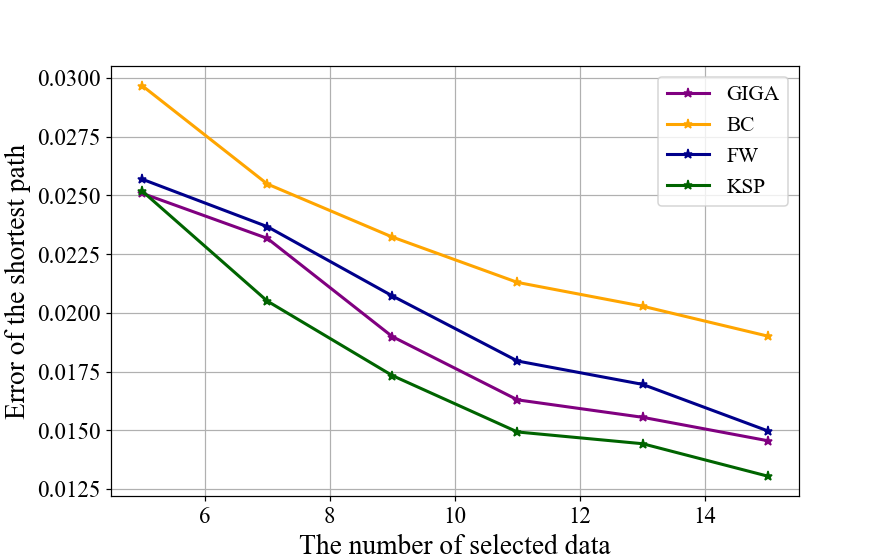

In [9]:
import matplotlib.pyplot as plt
import matplotlib 
matplotlib.use('nbagg')
import numpy as np
import pylab
%matplotlib notebook
import matplotlib.font_manager as font_manager

QQ= np.arange(5, 16, 2)


font = {'family' : 'Times New Roman',
        'weight' : 'bold',
        'size'   : 15}	
matplotlib.rc('font', **font)



IPM=np.array([0.02508635 , 0.02316712, 0.01898404, 0.01629304, 0.01555057, 0.01455422])
Giga=np.array([0.02517888, 0.02049799, 0.01732639, 0.01492556, 0.01442567,0.0130458 ])
FW=np.array([0.02568635, 0.02366712, 0.02071702, 0.01794642, 0.01695232,0.01497409])
BC=np.array([0.02966562, 0.02548261, 0.02322364, 0.02129286, 0.02028076,0.01900788])





import matplotlib.pyplot as plt
QQ= np.arange(5, 16, 2)
x =QQ

plt.plot(x, IPM, "-*", label="GIGA", linewidth=2, color='purple')
plt.plot(x, BC, "-*", label="BC", linewidth=2, color='orange')
plt.plot(x, FW, "-*", label="FW", linewidth=2, color='darkblue')
plt.plot(x, Giga, "-*", label="KSP", linewidth=2, color='darkgreen')
# plt.plot(x, Error_IPM, "-*", label="RND", linewidth=2)
plt.legend(fontsize=14)


plt.xlabel('The number of selected data', fontsize=18, fontname='Times New Roman' )
plt.ylabel('Error of the shortest path',fontsize=18, fontname='Times New Roman')

# plt.xticks([2, 3, 5], size=14)
# plt.yticks(size=14)
plt.savefig("siamese.png")
plt.show()

plt.grid()